In [9]:
%pip install opencv-contrib-python matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   --------- ------------------------------ 1.8/7.8 MB 10.1 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/7.8 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 13.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 31.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 37.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter

In [14]:
image_path = './SatelliteImage.jpg'
image = Image.open(image_path)
 
gray_image = image.convert('L')
gray_array = np.array(gray_image)
 
# Thresholding
# Fixed Thresholding
threshold_value = 128  # Example value
binary_image = gray_array > threshold_value
 
# Adaptive Thresholding
window_size = 25  # Example window size
local_mean = uniform_filter(gray_array, size=window_size)
adaptive_binary_image = gray_array > local_mean
 
# Contrast Stretching
# Linear Contrast Stretching
min_intensity = np.min(gray_array)
max_intensity = np.max(gray_array)
stretched_array = ((gray_array - min_intensity) / (max_intensity - min_intensity) * 255).astype(np.uint8)
 
# Non-Linear Contrast Stretching (Gamma Correction)
gamma = 2.2  # Example value
gamma_corrected_array = ((gray_array / 255.0) ** (1.0 / gamma) * 255).astype(np.uint8)
 

(np.float64(-0.5), np.float64(959.5), np.float64(539.5), np.float64(-0.5))

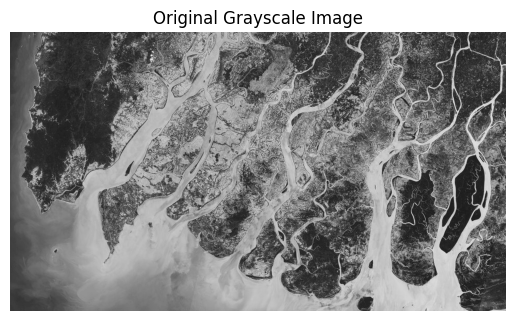

In [19]:
plt.title('Original Grayscale Image')
plt.imshow(gray_array, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(959.5), np.float64(539.5), np.float64(-0.5))

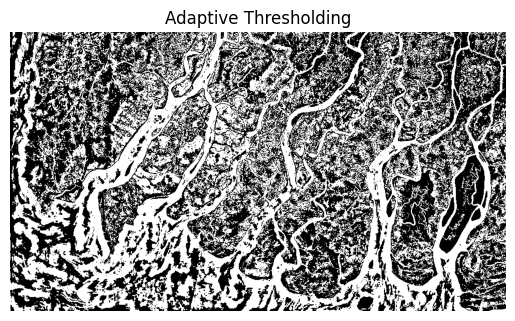

In [20]:
plt.title('Adaptive Thresholding')
plt.imshow(adaptive_binary_image, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(959.5), np.float64(539.5), np.float64(-0.5))

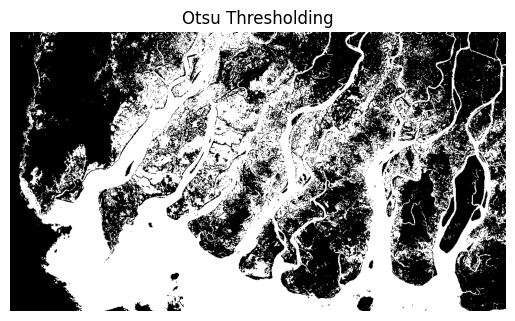

In [21]:
#Otsu Thresholding
_, otsu_image = cv2.threshold(gray_array,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
otsu_image = Image.fromarray(otsu_image)
plt.title("Otsu Thresholding")
plt.imshow(otsu_image, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(959.5), np.float64(539.5), np.float64(-0.5))

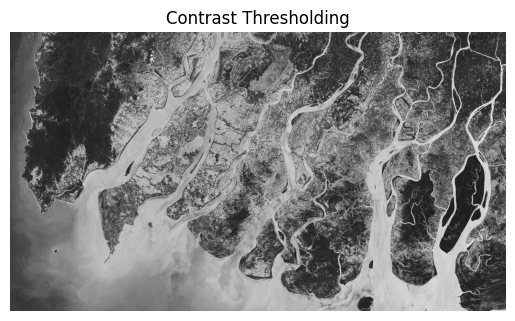

In [17]:
plt.title('Contrast Thresholding')
plt.imshow(stretched_array, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(959.5), np.float64(539.5), np.float64(-0.5))

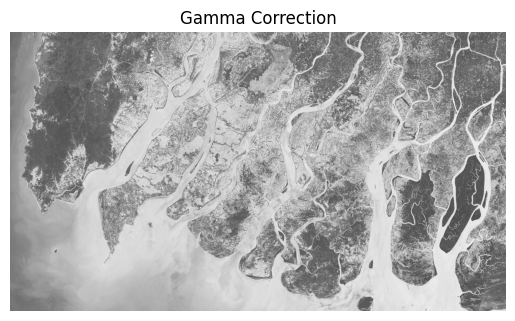

In [18]:
plt.title('Gamma Correction')
plt.imshow(gamma_corrected_array, cmap='gray')
plt.axis('off')